Signals generated by Relative Strength Index (RSI) Indicator

In [1]:
import datetime

import numpy as np
import pandas as pd

import vectorbt as vbt

In [2]:
end_time = datetime.datetime.now()
start_time = end_time - datetime.timedelta(days=729)

interval = "1h"

In [3]:
symbols = [
    "BTC-USD", 
    "ETH-USD"
]

windows = [
    14,
    21
]

In [4]:
price = vbt.YFData.download(
    symbols = symbols,
    missing_index='drop',
    interval=interval,
    start = start_time,
    end = end_time
).get('Close')

/home/oskar/anaconda3/envs/vectorbt/lib/python3.10/site-packages/vectorbt/data/base.py:527: UserWarning: Symbols have mismatching index. Dropping missing data points.
  data = cls.align_index(data, missing=missing_index)


In [5]:
price

symbol,BTC-USD,ETH-USD
Datetime,,
2021-05-27 14:00:00+00:00,40115.972656,2847.698975
2021-05-27 15:00:00+00:00,39742.800781,2810.382812
2021-05-27 16:00:00+00:00,38885.699219,2768.158447
2021-05-27 17:00:00+00:00,39148.902344,2790.266357
2021-05-27 18:00:00+00:00,39116.804688,2789.793701
...,...,...
2023-05-26 10:00:00+00:00,26456.171875,1813.794312
2023-05-26 11:00:00+00:00,26472.757812,1813.353027
2023-05-26 12:00:00+00:00,26444.224609,1815.208374


<Axes: xlabel='Datetime'>

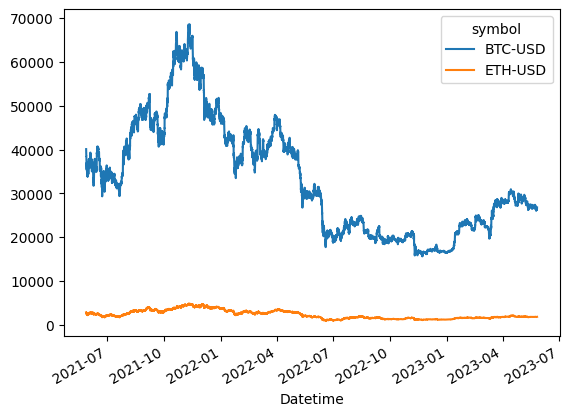

In [6]:
price.plot()

In [7]:
rsi: vbt.indicators.basic.RSI = vbt.RSI.run(price, window=windows)

In [8]:
rsi.rsi

rsi_window                        14                    21           
symbol                       BTC-USD    ETH-USD    BTC-USD    ETH-USD
Datetime                                                             
2021-05-27 14:00:00+00:00        NaN        NaN        NaN        NaN
2021-05-27 15:00:00+00:00        NaN        NaN        NaN        NaN
2021-05-27 16:00:00+00:00        NaN        NaN        NaN        NaN
2021-05-27 17:00:00+00:00        NaN        NaN        NaN        NaN
2021-05-27 18:00:00+00:00        NaN        NaN        NaN        NaN
...                              ...        ...        ...        ...
2023-05-26 10:00:00+00:00  46.147413  54.499606  56.624972  60.877394
2023-05-26 11:00:00+00:00  50.144092  58.769108  57.040563  61.126003
2023-05-26 12:00:00+00:00  48.053104  60.166965  64.396279  70.215656
2023-05-26 13:00:00+00:00  58.043570  70.813221  67.133233  71.352441
2023-05-26 14:00:00+00:00  72.420773  76.656151  73.139098  72.062221

[17241 rows x 4 columns]

In [9]:
print(rsi.rsi.columns)
rsi.plot(column=(14, 'BTC-USD'))

MultiIndex([(14, 'BTC-USD'),
            (14, 'ETH-USD'),
            (21, 'BTC-USD'),
            (21, 'ETH-USD')],
           names=['rsi_window', 'symbol'])


FigureWidget({
    'data': [{'name': 'RSI',
              'showlegend': True,
              'type': 'scatter',
              'uid': '4128635e-2c83-4d05-bd21-b1679dd0899f',
              'x': array([datetime.datetime(2021, 5, 27, 14, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 5, 27, 15, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 5, 27, 16, 0, tzinfo=datetime.timezone.utc),
                          ...,
                          datetime.datetime(2023, 5, 26, 12, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 5, 26, 13, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 5, 26, 14, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'y': array([        nan,         nan,         nan, ..., 48.05310397, 58.04356954,
                          72.42077264])}],
    'layout': {'height': 350,
               'l

In [10]:
entries = rsi.rsi_crossed_below(30)
exits = rsi.rsi_crossed_above(70)

In [11]:
# entries, exits

In [12]:
# portfolio
pf = vbt.Portfolio.from_signals(price, entries, exits, freq=interval)

In [13]:
# pf.stats(column=(14, 'BTC-USD'))
pf.stats()

/tmp/ipykernel_27739/2522381368.py:2: UserWarning:

Object has multiple columns. Aggregating using <function mean at 0x7f4c641e0670>. Pass column to select a single column/group.



Start                         2021-05-27 14:00:00+00:00
End                           2023-05-26 14:00:00+00:00
Period                                718 days 09:00:00
Start Value                                       100.0
End Value                                     67.458724
Total Return [%]                             -32.541276
Benchmark Return [%]                         -34.402092
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                               65.15485
Max Drawdown Duration                 581 days 21:45:00
Total Trades                                     162.75
Total Closed Trades                              162.75
Total Open Trades                                   0.0
Open Trade PnL                                      0.0
Win Rate [%]                                  63.059764
Best Trade [%]                                11.559462
Worst Trade [%]                              -31

In [14]:
pf.total_return()

rsi_window  symbol 
14          BTC-USD   -0.316826
            ETH-USD   -0.204400
21          BTC-USD   -0.501035
            ETH-USD   -0.279390
Name: total_return, dtype: float64

In [15]:
pf.plot(column=(14, 'BTC-USD'))

FigureWidget({
    'data': [{'legendgroup': '0',
              'line': {'color': '#1f77b4'},
              'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': '028ec102-576f-46db-a4e4-8baa07503ba1',
              'x': array([datetime.datetime(2021, 5, 27, 14, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 5, 27, 15, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 5, 27, 16, 0, tzinfo=datetime.timezone.utc),
                          ...,
                          datetime.datetime(2023, 5, 26, 12, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 5, 26, 13, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 5, 26, 14, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'xaxis': 'x',
              'y': array([40115.97265625, 39742.80078125, 38885.69921875, ...,